# 1. First uncomment and install all the required Packages below.

In [1]:
#pip install paddleocr
#pip install scikit-image
#pip install pyspellchecker


# 2. From Installed packages import required libraries

In [2]:
from PIL import Image
from skimage import io as ioski
from skimage.color import rgb2gray
from matplotlib import pyplot as plt
import cv2
import io
import numpy as np
from spellchecker import SpellChecker
from paddleocr import PaddleOCR, draw_ocr
ocr= PaddleOCR(use_angle_cls=True, lang ='en')



[2024/05/01 04:37:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\ACER/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\ACER/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_lengt

# 3. Provide the path of the image in your local device

In [11]:
img_path = r"C:\Users\ACER\Data science\Main Project\Handwritten Image-to-text\Sample image\images (1).jpeg"

# 4. Read the image using Opencv and matplotlib to visualize it.

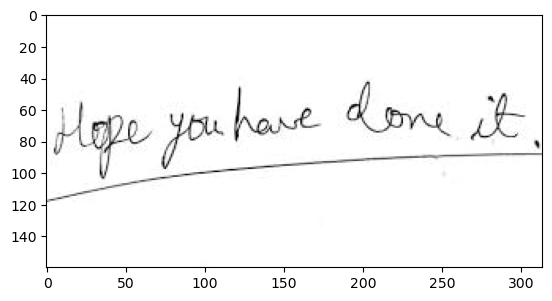

In [12]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

# 5. Image Preprocessing

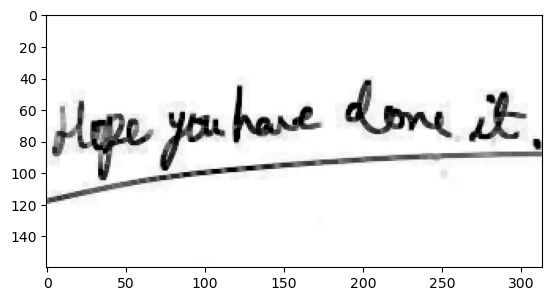

In [13]:
# Increase contrast
pxmin = np.min(img)
pxmax = np.max(img)
imgContrast = (img - pxmin) / (pxmax - pxmin)* 100

# Convert pixel values back to uint8
imgContrast = np.uint8(imgContrast)

# Morphological operation: erosion
kernel = np.ones((3, 3), np.uint8)
imgMorph = cv2.erode(imgContrast, kernel, iterations=1)

# Display the processed image
plt.imshow(imgMorph, cmap='gray')
plt.show()

# 6. Reading the text in the image using Paddleocr

In [14]:
result = ocr.ocr(img , cls=True)

[2024/05/01 04:38:36] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.27199649810791016
[2024/05/01 04:38:37] ppocr DEBUG: cls num  : 1, elapsed : 0.08200478553771973
[2024/05/01 04:38:37] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1929924488067627


In [15]:
tuples_list = []
for sublist1 in result:
    for sublist2 in sublist1:
        tuples_list.append(sublist2[1])

# Print the extracted tuples
string="" 
for i in tuples_list:
    string += i[0] +" " 

In [16]:
string

'Lofe you hane done it '

# 7. Rectifying the string using Pyspellchecker

In [17]:
# Initialize SpellChecker
spell = SpellChecker()

# Split text into lines
lines = string.strip().split('\n')

# Initialize variables
new_lines = []

# Iterate through each line
for line in lines:
    # Split each line into words
    words = line.split()
    new_line = ""
    # Iterate through each word
    for word in words:
        # Get the correction for the word
        correction = spell.correction(word)
        # Check if the correction is not None
        if correction is not None:
            new_line += correction + " "
        else:
            # If no correction is found, use the original word
            new_line += word + " "
    # Append the corrected line to the list of new lines
    new_lines.append(new_line.strip())

# Join the corrected lines into a single string
corrected_text = '\n'.join(new_lines)



### This is the corrected output

In [18]:
corrected_text


'love you have done it'